## Ex 5: Probe goes haywire

In [57]:
import matplotlib.pyplot as plt
from space_base import GravBody, Probe
from numpy import sqrt, linspace, pi, cos, sin, arange

# Constants
G = 6.67e-11  # Gravitational constant
moon = GravBody(name="Moon", mass=7.34767309e22, radius=1.7371e6)  # Moon as an object with mass and radius

Now that we want to use 3D coordinates we will need to adapt the previous formulas. Of course, as we are now reaching high altitude we will also compute realistic gravity instead of uniform. So, our state vectors will follows these equations:

$$\frac{dx}{dt}=V_x$$
$$\frac{dy}{dt}=V_y$$
$$\frac{dz}{dt}=V_z$$

$$\frac{dV_x}{dt}=-\frac{GM}{r^3}x$$
$$\frac{dV_y}{dt}=-\frac{GM}{r^3}y$$
$$\frac{dV_z}{dt}=-\frac{GM}{r^3}z$$

In [58]:

def probeqnsmoon(t, posvel):
    r = sqrt(posvel[0] ** 2 + posvel[1] ** 2 + posvel[2] ** 2)
    f = -G * moon.mass / r ** 3
    axyz = f * posvel[0], f * posvel[1], f * posvel[2]
    return posvel[3], posvel[4], posvel[5], axyz[0], axyz[1], axyz[2]

To solve this problem we need to compute the inital velocity so that $Q=\frac{V^2R_{moon}}{GM_{moon}}$ where $Q=1$.
For that we now that $\lVert\vec{V}\rVert = \sqrt{V^2}$.

So, 
$$\lVert\vec{V}\rVert = \sqrt{\frac{QGM_{moon}}{R_{moon}}}$$

In [59]:
Q = 1
v = sqrt(Q * G * moon.mass / moon.radius)  # Velocity of the probe
v / 1e3  # Velocity in km/s

1.6796756238936446

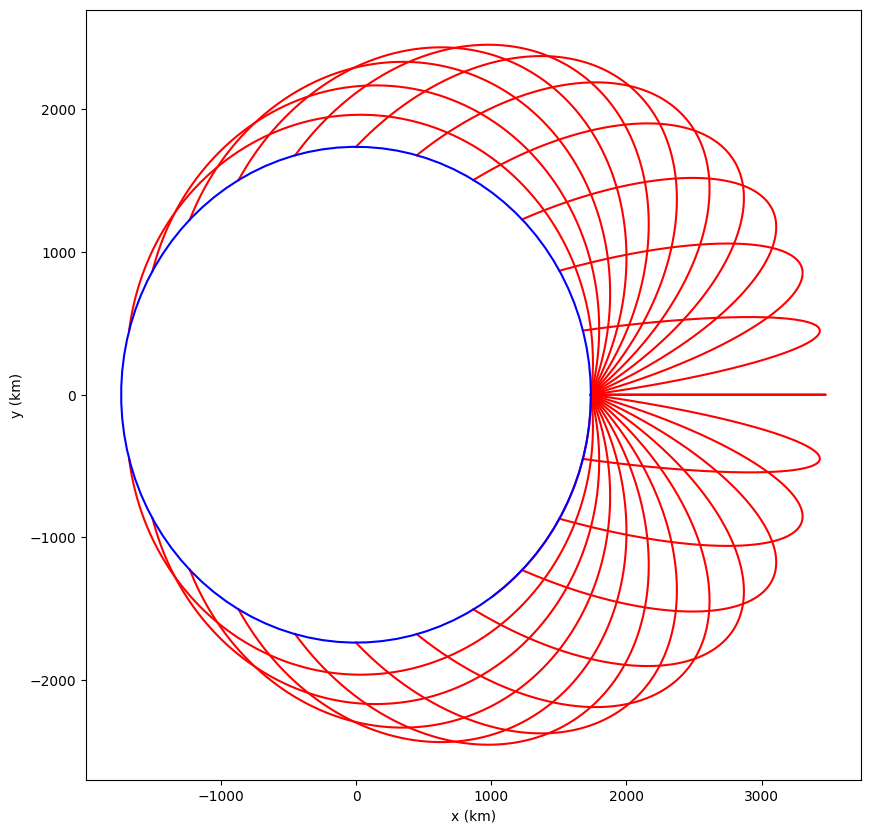

In [60]:
fig = plt.figure(figsize=(10, 10)) # create figure, figsize can be changed as preferred
ax = fig.add_subplot(111)
init_angles = arange(-pi/2, pi/2, pi/24)  # Angle of the probe

# Initial Conditions
t_final = 3600 * 12 # determined trajectory time
t_num = t_final # number of steps in trajectory
xyz0 = [moon.radius, 0, 0]  # start position
for angle in init_angles:
    vxyz0 = [v * cos(angle), v * sin(angle), 0]  # start vertical speed

    probe = Probe(probeqnsmoon, t_final, t_num, x0=xyz0[0], vx0=vxyz0[0], 
                y0=xyz0[1], vy0=vxyz0[1], z0=xyz0[2], vz0=vxyz0[2], event=moon.radius) # probe as an object
    t, posvel = probe.odesolve() # solve the differential equations
    ax.plot(posvel[:, 0] / 1e3, posvel[:, 1] / 1e3, color='red')

# Plotting Moon
uang = linspace(0, 2 * pi, 100)
x = (moon.radius / 1e3) * cos(uang)
y = (moon.radius / 1e3) * sin(uang)
ax.plot(x, y, color='blue')
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
plt.show() # make plot appear

From what we saw with this simultation their is no safest place on the moon to be when the probe launcher goes haywire. Even the exact opposite side of the planet (in our case x=-moon.radius, y=0, z=0). Because, when Q = 1 our speed if equal to $\sqrt{\frac{GM_{moon}}{R_{moon}}}$ which is, according to newton's second law, the speed of a perfect circular orbit for our altitude. This mean that, in a perfect case like ours where the planet is perfectly circular, the probe could reach an orbit with an altitude of 0m for initial angle of $\frac{\pi}{2}$ (or $-\frac{\pi}{2}$). So, it will reach every single point of the moon.